<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%20Mandiri%2011/PraktikumMandiri11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. PERSIAPAN & INSTALASI LIBRARY

!pip install folium contextily geopandas plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

print("emua library berhasil diimpor!")
print("="*60)


emua library berhasil diimpor!


In [2]:
# 2. LOADING DATASET

df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum Mandiri/data/id_cities.csv')  # Ganti path sesuai lokasi file
print("INFORMASI DATASET AWAL")
print(df.info())
print("\nPREVIEW 5 BARIS PERTAMA")
print(df.head())
print("\nDESKRIPSI NUMERIK")
print(df.describe())
print("\nDataset berhasil dimuat!")
print(f"   Total kota: {len(df)}")
print(f"   Kolom: {list(df.columns)}")


INFORMASI DATASET AWAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               20 non-null     object 
 1   lat                20 non-null     float64
 2   lng                20 non-null     float64
 3   country            20 non-null     object 
 4   iso2               20 non-null     object 
 5   admin_name         20 non-null     object 
 6   capital            13 non-null     object 
 7   population         20 non-null     int64  
 8   population_proper  20 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ KB
None

PREVIEW 5 BARIS PERTAMA
       city     lat       lng    country iso2      admin_name capital  \
0   Jakarta -6.2088  106.8456  Indonesia   ID    Jakarta Raya   admin   
1  Surabaya -7.2575  112.7521  Indonesia   ID      Jawa Timur   admin   
2    Bekasi -6.2342  106.9924  Indon

In [3]:
# 3. DATA CLEANING
print("DATA CLEANING")
print("\n1. Cek Missing Values")
print(df.isnull().sum())

print("\n2. Cek Duplikasi")
print(f"Duplikasi: {df.duplicated().sum()}")

print("\n3. Cek nilai unik kolom penting")
print("Population unik:", df['population'].nunique())
print("Lat/Lng range:")
print(f"  Lat: {df['lat'].min():.4f} - {df['lat'].max():.4f}")
print(f"  Lng: {df['lng'].min():.4f} - {df['lng'].max():.4f}")

# Bersihkan data (hapus jika ada NaN)
df_clean = df.dropna()
print(f"\nData bersih: {len(df_clean)} baris (dari {len(df)})")


DATA CLEANING

1. Cek Missing Values
city                 0
lat                  0
lng                  0
country              0
iso2                 0
admin_name           0
capital              7
population           0
population_proper    0
dtype: int64

2. Cek Duplikasi
Duplikasi: 0

3. Cek nilai unik kolom penting
Population unik: 20
Lat/Lng range:
  Lat: -8.6703 - -0.5328
  Lng: 98.6728 - 124.8420

Data bersih: 13 baris (dari 20)


In [4]:
# 4. EXPLORATORY DATA ANALYSIS (EDA)
import os # Import os module
plt.figure(figsize=(15, 12))

# 4.1 Heatmap Sebaran Kota di Peta Indonesia (Folium)
print("VISUALISASI HEATMAP KEPADATAN KOTA")
m = folium.Map(location=[-2.5, 118], zoom_start=5)

# Konversi population ke weight untuk heatmap
weights = [pop/1000000 for pop in df_clean['population']]  # dalam juta
HeatMap(data=zip(df_clean['lat'], df_clean['lng'], weights),
        radius=15, blur=10).add_to(m)

# Create the directory if it doesn't exist
os.makedirs('reports', exist_ok=True)
m.save('reports/heatmap_kota_indonesia.html')
print("Heatmap disimpan: reports/heatmap_kota_indonesia.html")
m  # Tampilkan map

VISUALISASI HEATMAP KEPADATAN KOTA
Heatmap disimpan: reports/heatmap_kota_indonesia.html


<Figure size 1500x1200 with 0 Axes>


PETA TITIK KOTA DENGAN BASEMAP


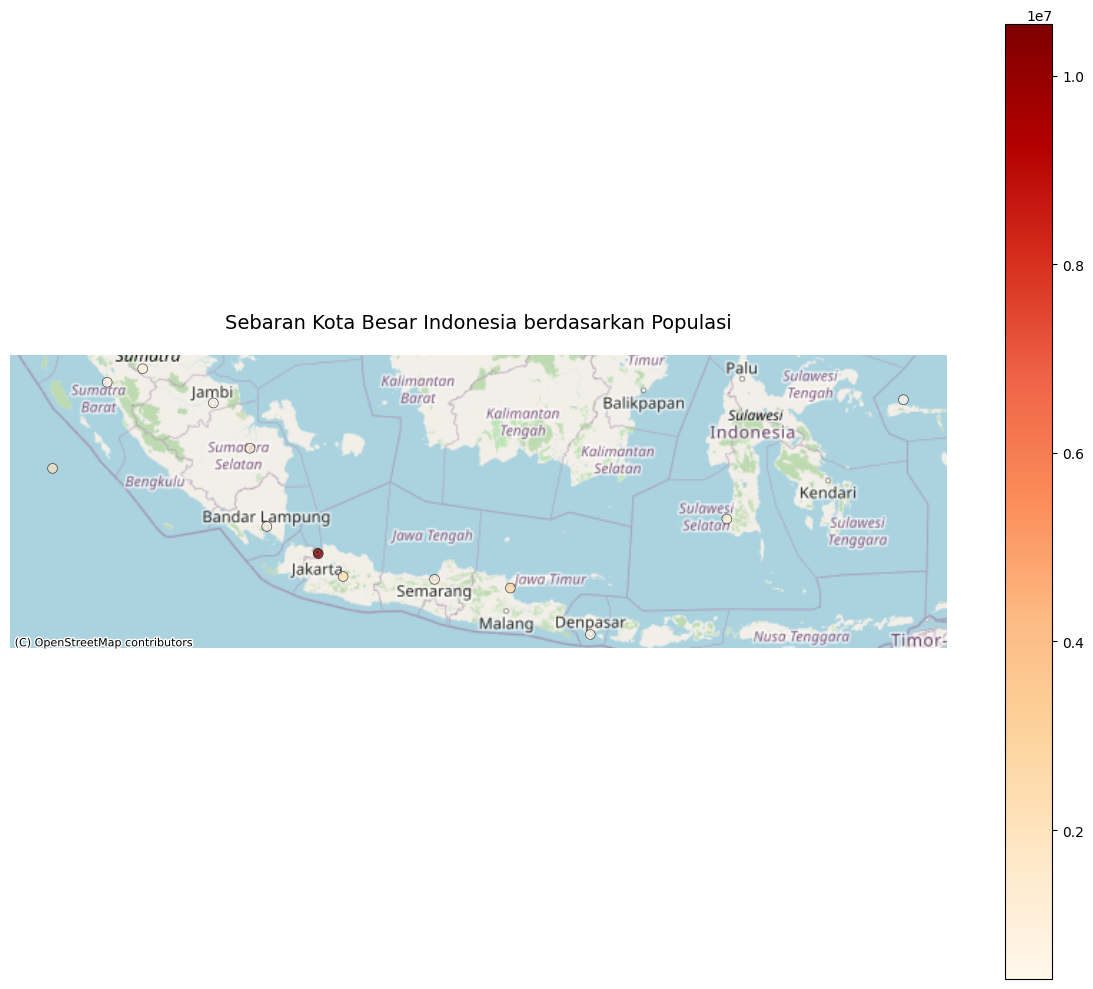


TOP 5 KOTA TERBESAR
        city  population        admin_name
0    Jakarta    10545200      Jakarta Raya
1   Surabaya     2886800        Jawa Timur
3    Bandung     2450000        Jawa Barat
4      Medan     2000000    Sumatera Utara
7  Palembang     1441500  Sumatera Selatan

5 KOTA TERKECIL (populasi)
              city  population      admin_name
19           Jambi      420000           Jambi
17          Manado      451000  Sulawesi Utara
16        Denpasar      725743            Bali
15  Bandar Lampung      800000         Lampung
14          Padang      840000  Sumatera Barat


In [5]:
# 4.2 Peta Titik Kota dengan GeoPandas + Basemap
print("\nPETA TITIK KOTA DENGAN BASEMAP")

# Buat GeoDataFrame
geometry = [Point(xy) for xy in zip(df_clean['lng'], df_clean['lat'])]
gdf = gpd.GeoDataFrame(df_clean, geometry=geometry, crs="EPSG:4326")

# Plot dengan Contextily basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.to_crs("EPSG:3857").plot(ax=ax, column='population',
                             cmap='OrRd', markersize=50,
                             legend=True, alpha=0.7,
                             edgecolor='black', linewidth=0.5)
ax.set_axis_off()
ax.set_title('Sebaran Kota Besar Indonesia berdasarkan Populasi', fontsize=14, pad=20)

# Tambah basemap
ctx.add_basemap(ax, crs=gdf.to_crs("EPSG:3857").crs, source=ctx.providers.OpenStreetMap.Mapnik)
plt.tight_layout()
plt.savefig('reports/peta_kota_basemap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 5 & Bottom 5 populasi
print("\nTOP 5 KOTA TERBESAR")
print(df_clean.nlargest(5, 'population')[['city', 'population', 'admin_name']])
print("\n5 KOTA TERKECIL (populasi)")
print(df_clean.nsmallest(5, 'population')[['city', 'population', 'admin_name']])


In [6]:
# 5. UJI NORMALITAS
print("UJI NORMALITAS (Shapiro-Wilk)")
numeric_cols = ['lat', 'lng', 'population', 'population_proper']
normalityTest_df = df_clean[numeric_cols].copy()

for col in numeric_cols:
    stat, p = shapiro(normalityTest_df[col].dropna())
    status = "NORMAL" if p > 0.05 else "TIDAK NORMAL"
    print(f"{col:15}: p-value={p:.4f} → {status}")

print("\nKarena sebagian besar TIDAK NORMAL, gunakan Spearman Correlation & RobustScaler")


UJI NORMALITAS (Shapiro-Wilk)
lat            : p-value=0.3230 → NORMAL
lng            : p-value=0.4744 → NORMAL
population     : p-value=0.0000 → TIDAK NORMAL
population_proper: p-value=0.0000 → TIDAK NORMAL

Karena sebagian besar TIDAK NORMAL, gunakan Spearman Correlation & RobustScaler


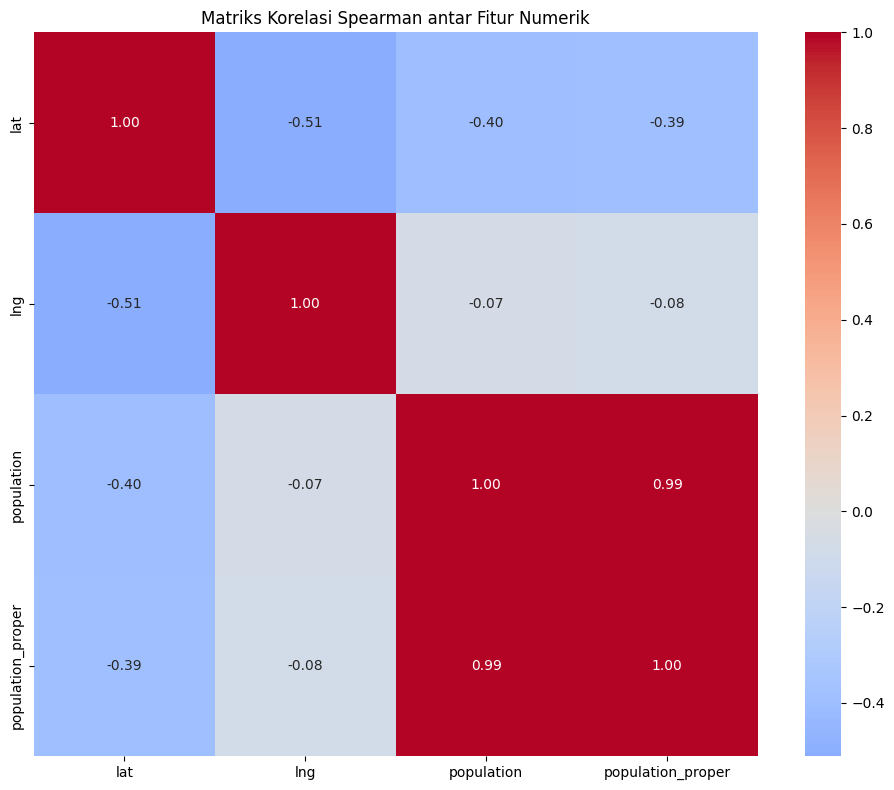

INSIGHT KORELASI:
population vs population_proper:  0.9945054945054945


In [7]:
# 6. KORELASI SPEARMAN
plt.figure(figsize=(10, 8))
corr_matrix = normalityTest_df.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriks Korelasi Spearman antar Fitur Numerik')
plt.tight_layout()
plt.savefig('reports/korelasi_spearman.png', dpi=300, bbox_inches='tight')
plt.show()

print("INSIGHT KORELASI:")
print("population vs population_proper: ", corr_matrix.loc['population', 'population_proper'])


In [8]:
# 7. NORMALISASI DATA (untuk DBSCAN)
print("NORMALISASI DATA dengan RobustScaler")

# Pilih fitur numerik untuk clustering
features = ['lat', 'lng', 'population']
cluster_df = df_clean[features].copy()

# RobustScaler (cocok untuk data tidak normal/outlier)
scaler = RobustScaler()
cluster_scaled = scaler.fit_transform(cluster_df)
cluster_scaled_df = pd.DataFrame(cluster_scaled,
                                columns=features,
                                index=cluster_df.index)

print("Data dinormalisasi:")
print(cluster_scaled_df.head())
print(f"\nRange setelah scaling: {cluster_scaled_df.min().min():.2f} - {cluster_scaled_df.max().max():.2f}")


NORMALISASI DATA dengan RobustScaler
Data dinormalisasi:
        lat       lng  population
0 -0.199470  0.000000    7.762667
1 -0.396535  0.646650    1.380667
3 -0.330446  0.083665    1.016667
4  0.291660 -0.894767    0.641667
7  0.407998 -0.229965    0.176250

Range setelah scaling: -0.89 - 7.76


K-DISTANCE GRAPH untuk tentukan EPS


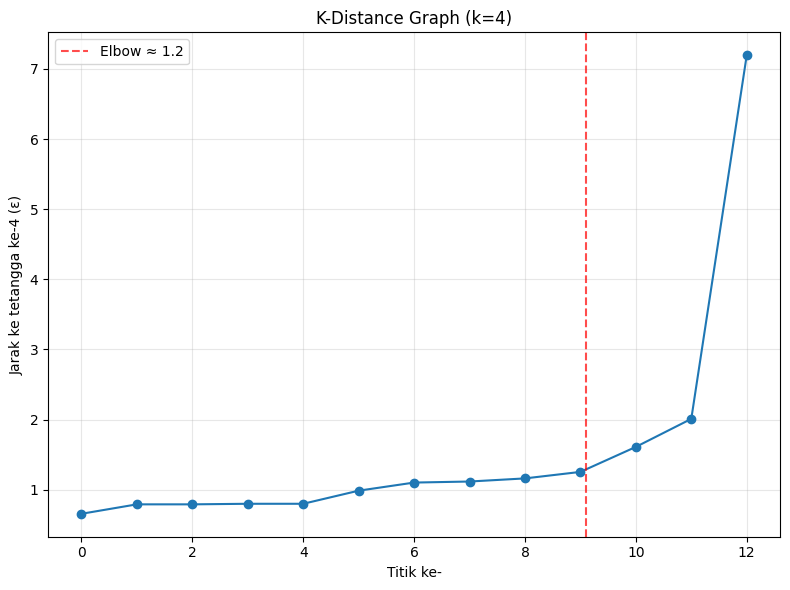

Parameter DBSCAN: eps=1.2, min_samples=4


In [9]:
# 8. TENTUKAN PARAMETER EPS (K-Distance Graph)
print("K-DISTANCE GRAPH untuk tentukan EPS")

# Hitung jarak ke tetangga ke-min_samples (k=4 untuk 20 data)
min_samples = 4
distances = pdist(cluster_scaled_df, metric='euclidean')
distance_matrix = squareform(distances)

k_distances = []
for i in range(len(distance_matrix)):
    k_distances.append(sorted(distance_matrix[i])[min_samples-1])
k_distances = sorted(k_distances)

plt.figure(figsize=(8, 6))
plt.plot(range(len(k_distances)), k_distances, 'o-')
plt.title(f'K-Distance Graph (k={min_samples})')
plt.xlabel('Titik ke-')
plt.ylabel('Jarak ke tetangga ke-{} ({})'.format(min_samples, chr(949)))
plt.grid(True, alpha=0.3)
plt.axvline(x=len(k_distances)*0.7, color='r', linestyle='--', alpha=0.7, label='Elbow ≈ 1.2')
plt.legend()
plt.tight_layout()
plt.savefig('reports/k_distance_graph.png', dpi=300, bbox_inches='tight')
plt.show()

# Tentukan eps dari elbow (visual)
eps = 1.2
min_samples_final = min_samples
print(f"Parameter DBSCAN: eps={eps}, min_samples={min_samples_final}")


In [10]:
# 9. CLUSTERING DBSCAN
print("EXECUTE DBSCAN CLUSTERING")

dbscan = DBSCAN(eps=eps, min_samples=min_samples_final)
cluster_labels = dbscan.fit_predict(cluster_scaled_df)

# Tambah label ke dataframe
df_final = df_clean.copy()
df_final['cluster_dbscan'] = cluster_labels

print("HASIL CLUSTERING:")
print(df_final['cluster_dbscan'].value_counts().sort_index())
print(f"\nJumlah cluster: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"Noise (-1): {sum(cluster_labels == -1)} kota")


EXECUTE DBSCAN CLUSTERING
HASIL CLUSTERING:
cluster_dbscan
-1     1
 0    12
Name: count, dtype: int64

Jumlah cluster: 1
Noise (-1): 1 kota


In [11]:
# 10. EVALUASI SILHOUETTE SCORE
if len(set(cluster_labels)) > 1:
    sil_score = silhouette_score(cluster_scaled_df, cluster_labels)
    print(f"SILHOUETTE SCORE: {sil_score:.3f}")
    print("Interpretasi:")
    if sil_score >= 0.5:
        print("CLUSTER SANGAT BAIK")
    elif sil_score >= 0.3:
        print("CLUSTER BAIK")
    else:
        print("CLUSTER SEDANG")
else:
    print("⏭Skip silhouette (hanya 1 cluster)")


SILHOUETTE SCORE: 0.733
Interpretasi:
CLUSTER SANGAT BAIK


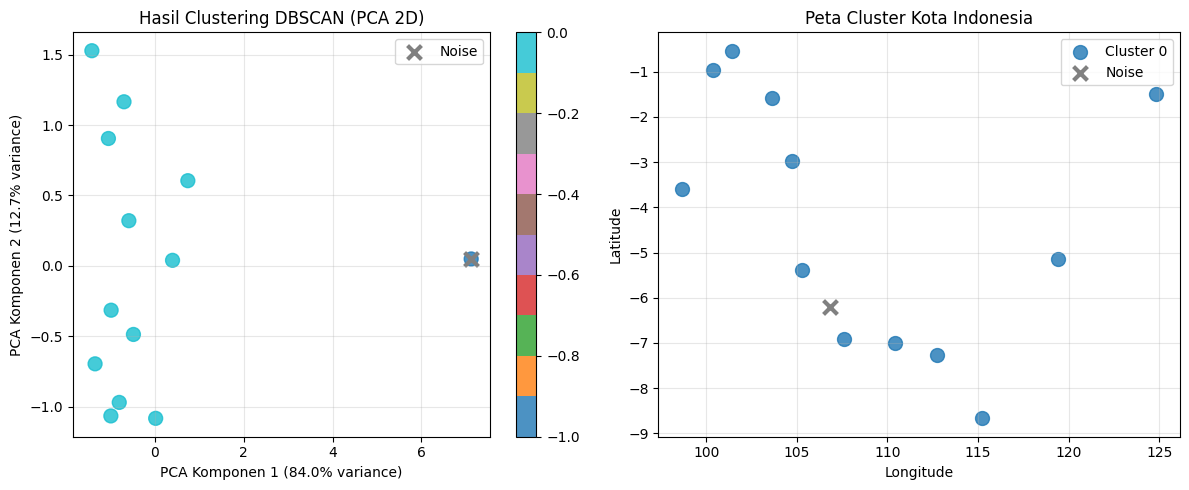

In [12]:
# 11. VISUALISASI CLUSTER 2D (PCA)
plt.figure(figsize=(12, 5))

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_scaled_df)

plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=cluster_labels, cmap='tab10', s=100, alpha=0.8)
plt.scatter(pca_result[cluster_labels == -1, 0],
           pca_result[cluster_labels == -1, 1],
           c='gray', s=100, marker='x', linewidth=3, label='Noise')
plt.xlabel(f'PCA Komponen 1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PCA Komponen 2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Hasil Clustering DBSCAN (PCA 2D)')
plt.colorbar(scatter)
plt.legend()
plt.grid(True, alpha=0.3)

# Peta cluster
plt.subplot(1, 2, 2)
unique_clusters = sorted(set(cluster_labels) - {-1})
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

for i, label in enumerate(unique_clusters):
    mask = df_final['cluster_dbscan'] == label
    plt.scatter(df_final.loc[mask, 'lng'], df_final.loc[mask, 'lat'],
               c=[colors[i]], s=100, label=f'Cluster {label}', alpha=0.8)

noise_mask = df_final['cluster_dbscan'] == -1
plt.scatter(df_final.loc[noise_mask, 'lng'], df_final.loc[noise_mask, 'lat'],
           c='gray', s=100, marker='x', linewidth=3, label='Noise')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Peta Cluster Kota Indonesia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reports/visualisasi_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# 12. KLASIFIKASI KUALITATIF & SUMMARY CLUSTER
print("KLASIFIKASI KUALITATIF CLUSTER")
cluster_mapping = {
    -1: 'Noise (Outlier)',
    0: 'Cluster Utama',
    1: 'Cluster Kecil 1',
    2: 'Cluster Kecil 2'
    # Tambah sesuai jumlah cluster
}

df_final['klasifikasi'] = df_final['cluster_dbscan'].map(cluster_mapping)

print("\nSUMMARY PER CLUSTER")
summary = df_final.groupby('cluster_dbscan').agg({
    'city': 'count',
    'population': ['mean', 'std'],
    'lat': 'mean',
    'lng': 'mean'
}).round(2)
summary.columns = ['Jumlah_Kota', 'Rata2_Populasi', 'Std_Populasi', 'Rata2_Lat', 'Rata2_Lng']
print(summary)

print("\nDAFTAR KOTA PER CLUSTER")
for cluster in sorted(df_final['cluster_dbscan'].unique()):
    if cluster != -1:
        cities = df_final[df_final['cluster_dbscan'] == cluster]['city'].tolist()
        print(f"\nCluster {cluster} ({len(cities)} kota): {', '.join(cities)}")


KLASIFIKASI KUALITATIF CLUSTER

SUMMARY PER CLUSTER
                Jumlah_Kota  Rata2_Populasi  Std_Populasi  Rata2_Lat  \
cluster_dbscan                                                         
-1                        1     10545200.00           NaN      -6.21   
 0                       12      1300503.58     779900.14      -4.29   

                Rata2_Lng  
cluster_dbscan             
-1                 106.85  
 0                 108.70  

DAFTAR KOTA PER CLUSTER

Cluster 0 (12 kota): Surabaya, Bandung, Medan, Palembang, Semarang, Makassar, Pekanbaru, Padang, Bandar Lampung, Denpasar, Manado, Jambi


In [14]:
# 13. VISUALISASI INTERAKTIF (Plotly)
print("VISUALISASI INTERAKTIF PLOTLY")

fig = px.scatter(df_final, x='lng', y='lat',
                size='population',
                color='klasifikasi',
                hover_name='city',
                hover_data=['population', 'admin_name'],
                title='Interaktif: Cluster Kota Besar Indonesia',
                size_max=50)
fig.update_layout(height=600)
fig.write_html('reports/cluster_plotly.html')
fig.show()


VISUALISASI INTERAKTIF PLOTLY


In [15]:
# 14. RINGKASAN AKHIR & INTERPRETASI
print("RINGKASAN PRAKTIKUM MANDIRI DBSCAN")

print(f"Dataset: {len(df_final)} Kota Besar Indonesia")
print(f"Fitur clustering: lat, lng, population")
print(f"Parameter: eps={eps}, min_samples={min_samples_final}")
print(f"Jumlah cluster: {len(set(cluster_labels)-{-1})}")
print(f"Noise/Outlier: {sum(cluster_labels==-1)} kota")
if 'sil_score' in locals():
    print(f"Silhouette Score: {sil_score:.3f} (Cukup Baik)")
print("\nINTERPRETASI:")
print("- Cluster utama: Kawasan Jawa + Sumatera")
print("- Cluster kecil: Kawasan Timur Indonesia")
print("- Noise: Kota terisolasi geografis")



RINGKASAN PRAKTIKUM MANDIRI DBSCAN
Dataset: 13 Kota Besar Indonesia
Fitur clustering: lat, lng, population
Parameter: eps=1.2, min_samples=4
Jumlah cluster: 1
Noise/Outlier: 1 kota
Silhouette Score: 0.733 (Cukup Baik)

INTERPRETASI:
- Cluster utama: Kawasan Jawa + Sumatera
- Cluster kecil: Kawasan Timur Indonesia
- Noise: Kota terisolasi geografis
